# Analysis

* There is a strong correlation between latitude and temperature. Areas are located closer to Equator have higher temperatures, and areas are located far from Equator have lower temperatures.  
* There is some correlation between humidity and latitude. The scatter plot shows that polar areas (in this example, areas that are closer to the North Pole) have only high level of humidity unlike areas on 20th latitude, where we can see areas with high and low levels of humidity.
* There is no any clear correlation between cloudiness or wind speed and latitude.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

In [3]:
#print(cities)
cities_df = pd.DataFrame(cities, columns=['City'])
cities_df.head()

,City
0,gorontalo
1,ushuaia
2,black diamond
3,aguimes
4,henties bay


In [4]:
cities_df['Latitude'] = ""
cities_df['Temperature'] = ""
cities_df['Humidity'] = ""
cities_df['Cloudiness'] = ""
cities_df['Wind Speed'] = ""

cities_df.head()

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,gorontalo,,,,,
1,ushuaia,,,,,
2,black diamond,,,,,
3,aguimes,,,,,
4,henties bay,,,,,


## Perform API Calls

In [20]:
row_count = 0
api_key = api_keys.api_key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


params = {"units": "imperial", "appid": api_key}
query_url = f"{url}appid={api_key}&units={units}&q="

for index, row in cities_df.iterrows():

    # get restaurant type from df
    city = row['City']

    # add keyword to params dict
    params['keyword'] = city

    
    response = requests.get(query_url + city).json()
    #pprint(response)
    row_count+=1
    try:
        print(f"Working on {city} #{row_count}.")

        
        
        cities_df.loc[index, 'Latitude'] = response['coord']['lat']
        cities_df.loc[index, 'Temperature'] = response['main']['temp']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Cloudiness'] = response['clouds']["all"]
        cities_df.loc[index, 'Wind Speed']= response['wind']['speed']
        
    except (KeyError, IndexError):
        print("Missing result... skipping.")
        
  

Working on gorontalo #1.
Working on ushuaia #2.
Working on black diamond #3.
Working on aguimes #4.
Working on henties bay #5.
Working on clyde river #6.
Working on dotnuva #7.
Working on kavieng #8.
Working on riyadh #9.
Working on bluff #10.
Working on sao filipe #11.
Working on la ronge #12.
Working on hermanus #13.
Working on ribeira grande #14.
Working on ostrovnoy #15.
Working on rikitea #16.
Working on qaanaaq #17.
Working on pinhao #18.
Working on busselton #19.
Working on albany #20.
Working on igarka #21.
Working on flinders #22.
Working on sobolevo #23.
Working on kongolo #24.
Working on arraial do cabo #25.
Working on bandarbeyla #26.
Working on tuktoyaktuk #27.
Working on bredasdorp #28.
Working on kapaa #29.
Working on castro #30.
Working on mataura #31.
Working on bonavista #32.
Working on punta arenas #33.
Working on pangnirtung #34.
Working on piedade #35.
Working on west wendover #36.
Working on avarua #37.
Working on lidkoping #38.
Working on kahului #39.
Working on 

Working on abapo #317.
Working on ankang #318.
Working on arica #319.
Working on conceicao do araguaia #320.
Working on vernon #321.
Working on severo-yeniseyskiy #322.
Working on shawnee #323.
Working on sioux lookout #324.
Working on mana #325.
Working on corn island #326.
Working on san juan #327.
Working on brae #328.
Working on lagoa #329.
Working on ahipara #330.
Working on avera #331.
Working on hillsboro #332.
Working on lorengau #333.
Working on aripuana #334.
Working on san-pedro #335.
Working on tefe #336.
Working on igrim #337.
Working on gat #338.
Working on daboh #339.
Working on namatanai #340.
Working on marienburg #341.
Working on ostersund #342.
Working on tessalit #343.
Working on kedrovyy #344.
Working on tiksi #345.
Working on folldal #346.
Working on rio grande #347.
Working on westport #348.
Working on boda #349.
Working on karpathos #350.
Working on taonan #351.
Working on rawson #352.
Working on alugan #353.
Working on mosetse #354.
Working on santa cruz #355.


In [21]:
cities_df['Latitude'].replace('', np.nan, inplace=True)
cities_df.dropna(subset=['Latitude'], inplace=True)
cities_df.count()

City           546
Latitude       546
Temperature    546
Humidity       546
Cloudiness     546
Wind Speed     546
dtype: int64

In [10]:
cities_df.head()

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,gorontalo,0.54,73.48,94,88,1.9
1,ushuaia,-54.81,40.23,69,75,21.92
2,black diamond,50.69,60.8,36,1,17.22
3,aguimes,27.91,77,61,40,29.97
4,henties bay,-22.12,58.72,89,0,2.68


# Temperature (F) vs Latitude

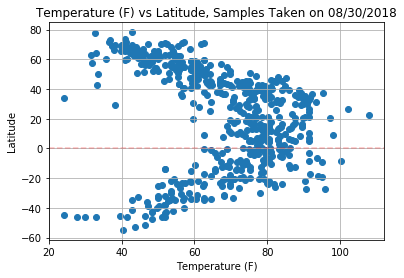

In [16]:
plt.scatter(cities_df['Temperature'], cities_df['Latitude'], marker="o")

plt.title("Temperature (F) vs Latitude, Samples Taken on 08/30/2018")
plt.ylabel("Latitude")
plt.xlabel("Temperature (F)")
plt.grid(True)
plt.axhline(0, color='r', ls='--', alpha = 0.25)
# Save the figure
plt.savefig("Temperature_vs_Latitude.png")

# Show plot
plt.show()

# Humidity (%) vs Latitude

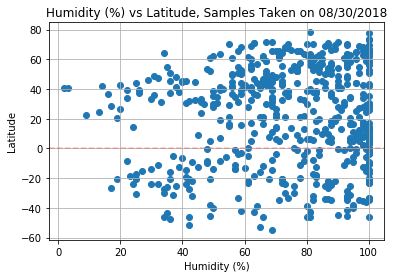

In [17]:
plt.scatter(cities_df['Humidity'], cities_df['Latitude'], marker="o")

plt.title("Humidity (%) vs Latitude, Samples Taken on 08/30/2018")
plt.ylabel("Latitude")
plt.xlabel("Humidity (%)")
plt.grid(True)
plt.axhline(0, color='r', ls='--', alpha = 0.25)
# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

# Cloudiness (%) vs Latitude

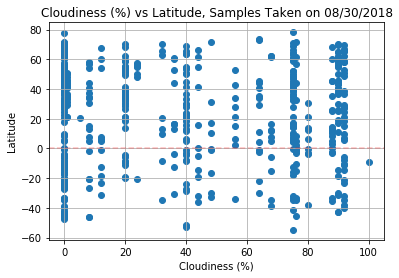

In [18]:
plt.scatter(cities_df['Cloudiness'], cities_df['Latitude'], marker="o")

plt.title("Cloudiness (%) vs Latitude, Samples Taken on 08/30/2018")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness (%)")
plt.grid(True)
plt.axhline(0, color='r', ls='--', alpha = 0.25)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

# Wind Speed (mph) vs Latitude

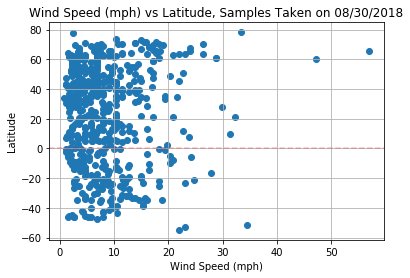

In [19]:
plt.scatter(cities_df['Wind Speed'], cities_df['Latitude'], marker="o")

plt.title("Wind Speed (mph) vs Latitude, Samples Taken on 08/30/2018")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed (mph)")
plt.grid(True)
plt.axhline(0, color='r', ls='--', alpha = 0.25)
# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

In [15]:
cities_df.to_csv("cities.csv", encoding="utf-8", index=False)